In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
raw_img_data = np.load('data.npy')
label_data = np.load('label.npy')

In [53]:
normalized_img_data = raw_img_data / 255.0
normalized_imshow_array = normalized_img_data.reshape(14780, 28, 28)

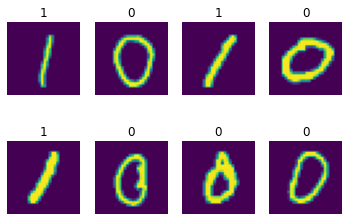

In [54]:
index = np.random.randint(0, len(normalized_imshow_array), size=8)
i = 0

fig, axs = plt.subplots(2, 4)
for r in range(2):
    for c in range(4):
        axs[r, c].imshow(normalized_imshow_array[index[i]].reshape(28, 28))
        axs[r, c].set_title(str(label_data[index[i]]))
        axs[r, c].axis('off')
        i+=1

In [43]:
relabeled_data = np.where(label_data == 1, -1, label_data)
relabeled_data = np.where(relabeled_data == 0, 1, relabeled_data)

In [44]:
(unique, counts) = np.unique(relabeled_data, return_counts=True)
frequencies_relabeled = np.asarray((unique, counts)).T

(unique, counts) = np.unique(label_data, return_counts=True)
frequencies_original = np.asarray((unique, counts)).T

print("original frequency counts")
print(frequencies_original)
print("after relabeling (1 --> -1, 0 --> 1)")
print(frequencies_relabeled)

original frequency counts
[[   0 6903]
 [   1 7877]]
after relabeling (1 --> -1, 0 --> 1)
[[  -1 7877]
 [   1 6903]]


In [45]:
train_num_samples = int(0.8 * len(relabeled_data))
test_num_samples = len(relabeled_data) - train_num_samples
print("80-20 Test-Train Split = " + str(train_num_samples) + "-" + str(test_num_samples))

train_indices = np.random.randint(0, len(relabeled_data), size=train_num_samples)
test_indices = np.random.randint(0, len(relabeled_data), size=test_num_samples)

80-20 Test-Train Split = 11824-2956


In [62]:
X_train, X_test = normalized_img_data[train_indices], normalized_img_data[test_indices]
Y_train, Y_test = relabeled_data[train_indices], relabeled_data[test_indices]

print("Size of Train vs Test = " + str(len(X_train)) + "-" + str(len(X_test)))

Size of Train vs Test = 11824-2956


In [63]:
mu, sigma = 0, 1
d = 28*28
beta_0 = np.random.normal(mu, sigma, 1)[0]
beta_1 = np.random.normal(mu, sigma, d)

In [64]:
def loss_function(beta_0, beta_1, X, Y):
    """
    :param beta_0, beta_1: Logistic Regression coefficients
    :return: Loss over Training set (X and Y are globals)
    """
    loss_function_sum = 0.0
    m = len(X)
    for i in range(m):
        loss_function_sum += np.log(1 + np.exp(-Y[i] * (beta_0 + np.sum(beta_1 * X[i, :]))))
    loss_function_result = loss_function_sum / m
    return loss_function_result

In [65]:
def compute_gradients(beta_0, beta_1, X, Y):
    """
    :return: Gradient of beta_0, Gradient of beta_1
    """
    d_beta_0_sum = 0.0
    d_beta_1_sum = 0.0
    m = len(X)
    for i in range(m):
        exponent_term = np.exp(-Y[i] * (beta_0 + beta_1.T * X[i, :]))
        d_beta_0_sum +=  Y[i] * exponent_term / (1 + exponent_term)
        d_beta_1_sum +=  Y[i] * X[i] * exponent_term / (1 + exponent_term)

    d_beta_0 = (-1.0 / m) * d_beta_0_sum
    d_beta_1 = (-1.0 / m) * d_beta_1_sum
    return d_beta_0, d_beta_1

In [ ]:
num_iterations = 50
learning_rate = 0.05

for _ in range(num_iterations):

    loss = loss_function(beta_0, beta_1, X_train, Y_train)
    d_beta_0, d_beta_1 = compute_gradients(beta_0, beta_1, X_train, Y_train)

    beta_0 = beta_0 - learning_rate * d_beta_0
    beta_1 = beta_1 - learning_rate * d_beta_1

    test_accuracy =
    test_loss = 